In [15]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('E:\marketing.csv')

In [18]:
df= data.copy()

In [21]:
df.shape

(40000, 14)

In [19]:
df.dtypes.value_counts()

object    9
int64     5
dtype: int64

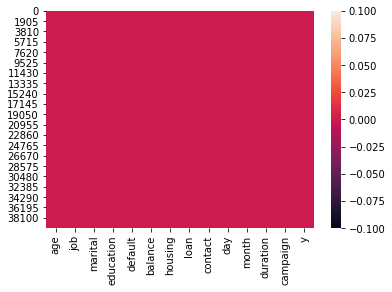

In [20]:
sns.heatmap(df.isnull())

In [22]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [23]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [24]:
df['y'].value_counts(normalize=True)

no     0.9276
yes    0.0724
Name: y, dtype: float64

In [24]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

job----------------------------------------------- ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital------------------------------------------- ['married' 'single' 'divorced']
education----------------------------------------- ['tertiary' 'secondary' 'unknown' 'primary']
default------------------------------------------- ['no' 'yes']
housing------------------------------------------- ['yes' 'no']
loan---------------------------------------------- ['no' 'yes']
contact------------------------------------------- ['unknown' 'cellular' 'telephone']
month--------------------------------------------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
y------------------------------------------------- ['no' 'yes']


In [47]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
 df[df['y'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,yes
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,yes
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,29,management,single,tertiary,no,637,yes,no,cellular,3,jun,340,1,yes
39988,55,management,divorced,tertiary,no,2383,no,no,cellular,3,jun,591,2,yes
39990,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,yes
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes


In [52]:
 df[df['y'] == 'no']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no
39994,35,management,married,tertiary,no,3109,yes,no,cellular,3,jun,467,1,no
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [53]:
 positive_df=df[df['y'] == 'yes']


In [54]:
 negative_df=df[df['y'] == 'no']


In [25]:
df= data.copy()

In [56]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [58]:
 #TRAIN TEST - NETTOYAGE -ENCODAGE

In [10]:
from sklearn.model_selection import train_test_split

In [26]:
trainset,testset = train_test_split(df,test_size = 0.2, random_state = 0) 

In [27]:
trainset['y'].value_counts()

no     29679
yes     2321
Name: y, dtype: int64

In [63]:
testset['y'].value_counts()

no     7425
yes     575
Name: y, dtype: int64

In [64]:
# ENCODAGE

In [65]:
code ={'no' :0,
       'yes':1,
       'married' :1,
       'single' :0,
       'divorced' :2,
       'unknown' :0,
       'primary' :1,
       'secondary' :2,
       'tertiary' : 3,
       'cellular' :1,
       'telephone' :2,
       'jan':1,
       'feb' :2,
       'mar' :3,
       'ap' :4,
       'may' :5,
       'jun' :6,
       'jul' :7,
       'aug' :8,
       'oct' :10,
       'nov' :11,
       'dec' :12

       
    
}

In [66]:
for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)

In [67]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,NaN,1,3,0,2143,1,0,0,5,5.0,261,1,0
1,44,NaN,0,2,0,29,1,0,0,5,5.0,151,1,0
2,33,NaN,1,2,0,2,1,1,0,5,5.0,76,1,0
3,47,NaN,1,0,0,1506,1,0,0,5,5.0,92,1,0
4,33,0.0,0,0,0,1,0,0,0,5,5.0,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,NaN,1,3,0,395,0,0,1,3,6.0,107,1,0
39996,30,NaN,0,3,0,3340,0,0,1,3,6.0,238,3,1
39997,54,NaN,2,2,0,200,0,0,1,3,6.0,170,1,1
39998,34,NaN,1,3,0,1047,0,0,1,3,6.0,342,1,0


In [30]:
def imputation(df):
    return df.dropna(axis=1)

In [31]:
def encoding(df):
    code ={'no' :0,
       'yes':1,
       'married' :1,
       'single' :0,
       'divorced' :2,
       'unknown' :0,
       'primary' :1,
       'secondary' :2,
       'tertiary' : 3,
       'cellular' :1,
       'telephone' :2,
       'jan':1,
       'feb' :2,
       'mar' :3,
       'ap' :4,
       'may' :5,
       'jun' :6,
       'jul' :7,
       'aug' :8,
       'oct' :10,
       'nov' :11,
       'dec' :12
      
    
}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col]= df[col].map(code)
    return df
    

In [32]:
def preprocessing(df):
    df = encoding(df)
    df = imputation(df)
    x = df.drop('y',axis=1)
    y = df['y']
    return x,y

In [34]:
X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

In [ ]:
# MODELING

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif


In [67]:
model = DecisionTreeClassifier(random_state =0)



In [76]:
# EVALUATION PROCESS

In [61]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [73]:
def evaluation(model):
    
    model.fit(X_train,Y_train)
    ypred =model.predict(X_test)
    
    print(confusion_matrix(Y_test,ypred))
    print(classification_report(Y_test,ypred))
    print(ypred)
    
    N,train_score,val_score = learning_curve(model,X_train,Y_train,
                                             cv =5, scoring = 'f1',
                                             train_sizes= np.linspace(0.1,1,10))
    
    plt.figure(figsize =(12,8))
    plt.plot(N,train_score.mean(axis =1),label ='train score')
    plt.plot(N,val_score.mean(axis =1),label ='validation score')
    plt.legend()
    

    

[[7012  413]
 [ 346  229]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7425
           1       0.36      0.40      0.38       575

    accuracy                           0.91      8000
   macro avg       0.65      0.67      0.66      8000
weighted avg       0.91      0.91      0.91      8000



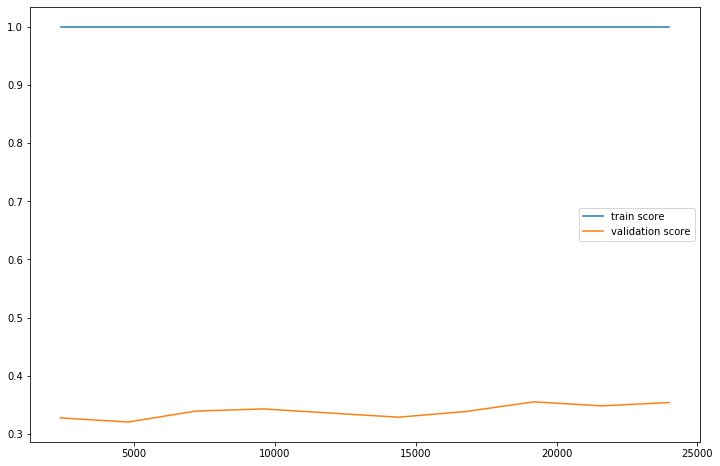

In [65]:
evaluation(model)